In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from pylab import rcParams


Each row shows a country and its emission data from 1750 -2019 measured in tonnes. 

In [26]:
data = pd.read_csv('data.csv')

In [27]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
data.drop(columns=['Unnamed: 32'], inplace=True)

In [52]:
data.drop(columns=['id'], inplace=True)

In [53]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Multicollinearity

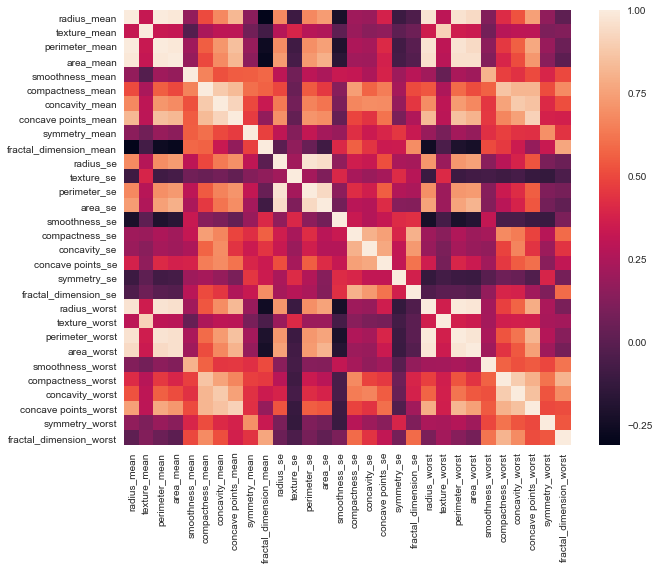

In [68]:
rcParams['figure.figsize'] = 10, 8
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [69]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [70]:
data.drop(columns=to_drop, inplace=True)

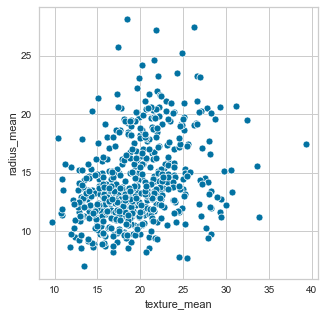

In [161]:
plt.figure(figsize=(5,5))

sns.scatterplot(X['texture_mean'], X['radius_mean'])


## DBScan

In [98]:
X = data[[col for col in data if col != 'diagnosis']]
y = data["diagnosis"]

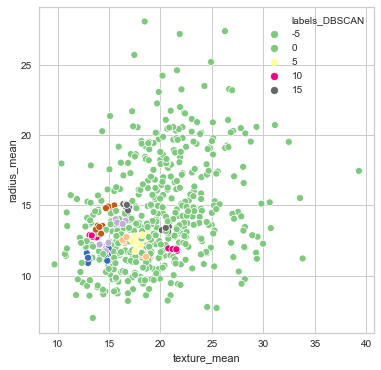

In [159]:

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6).fit(X)
X['labels_DBSCAN'] = dbscan.labels_


plt.figure(figsize=(6,6))
sns.scatterplot(X['texture_mean'], X['radius_mean'], hue = X['labels_DBSCAN'], palette='Accent')



## K-Means

In [109]:
X = data[[col for col in data if col != 'diagnosis']]
y = data["diagnosis"]

In [121]:

cluster = KMeans(n_clusters=5)
data_clusters = cluster.fit(X)
#X = StandardScaler().fit_transform(X)

y1_pred = cluster.labels_.astype(np.int)

print(silhouette_score(X, y1_pred))

0.3565690102614631


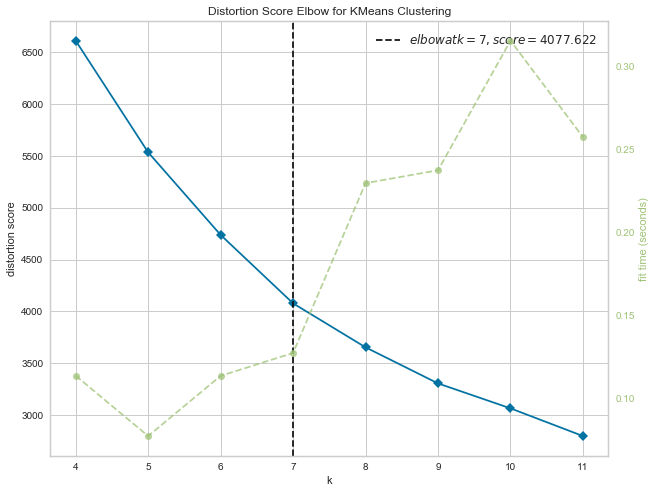

In [111]:
from yellowbrick.cluster import KElbowVisualizer


model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)
visualizer.poof()

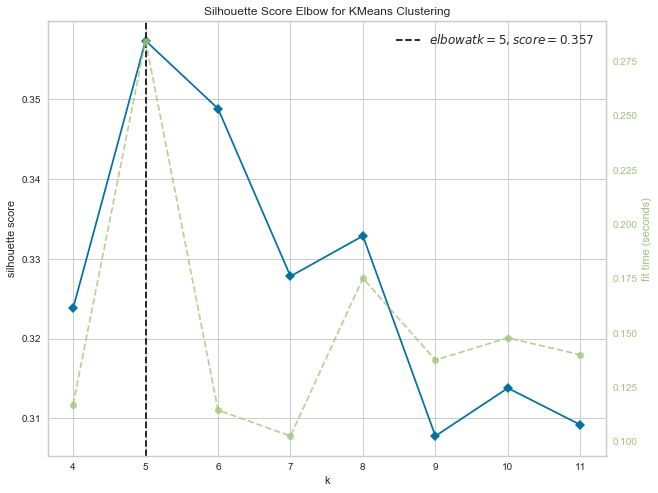

In [112]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric = 'silhouette')
visualizer.fit(X)
visualizer.poof()

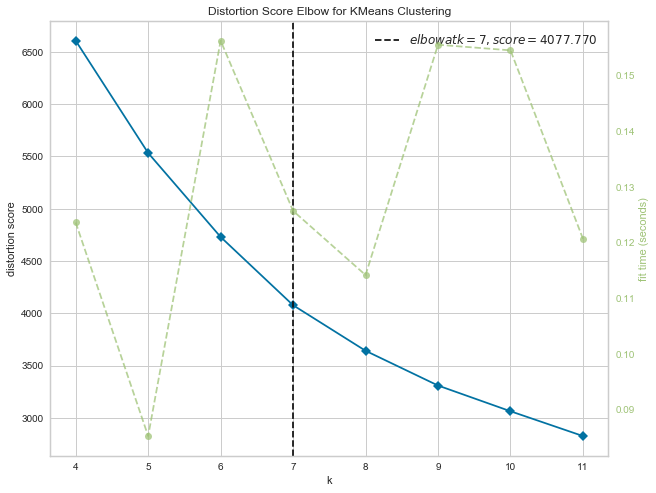

In [113]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric ='distortion')
visualizer.fit(X)
visualizer.poof()

In [114]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,labels_DBSCAN
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,-1
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,-1
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,-1
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,-1
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,-1


In [150]:
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'labels_DBSCAN', 'predictions'],
      dtype='object')

## Plotting scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

(7, 22)


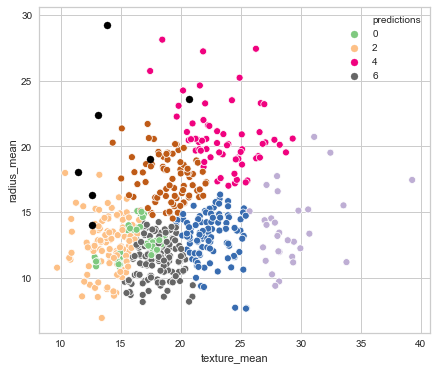

In [136]:

kmeans = KMeans(n_clusters = 7)
kmeans.fit(X)
y_pred = kmeans.predict(X)
X['predictions'] = y_pred


plt.figure(figsize=(7,6))

sns.scatterplot(X['texture_mean'], X['radius_mean'], hue = X["predictions"], palette='Accent')
centers = kmeans.cluster_centers_
print(centers.shape)

plt.scatter(centers[:,0], centers[:,1], c='black', s=50, alpha=1)

plt.show()

## PCA

(7, 22)


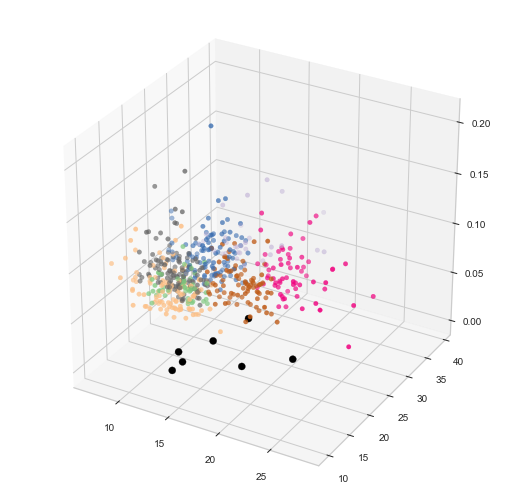

In [156]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R


fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

ax.scatter(X['radius_mean'], X['texture_mean'], X['fractal_dimension_worst'], c=X['predictions'], cmap="Accent")

centers = kmeans.cluster_centers_
print(centers.shape)
plt.scatter(centers[:,0], centers[:,1], c='black', s=50, alpha=1)

#ax.view_init(elev=20, azim=65)
plt.show()

In [157]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)


In [ ]:
# plotting PCA 1st and 2nd component

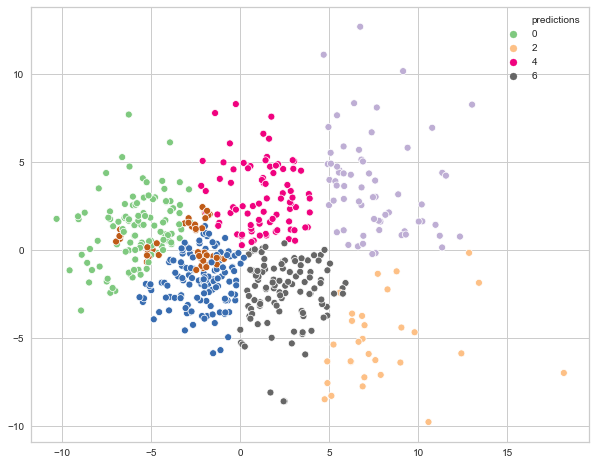

In [129]:
sns.scatterplot(pca_X[:,0], pca_X[:,1], hue = X["predictions"], palette='Accent')

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

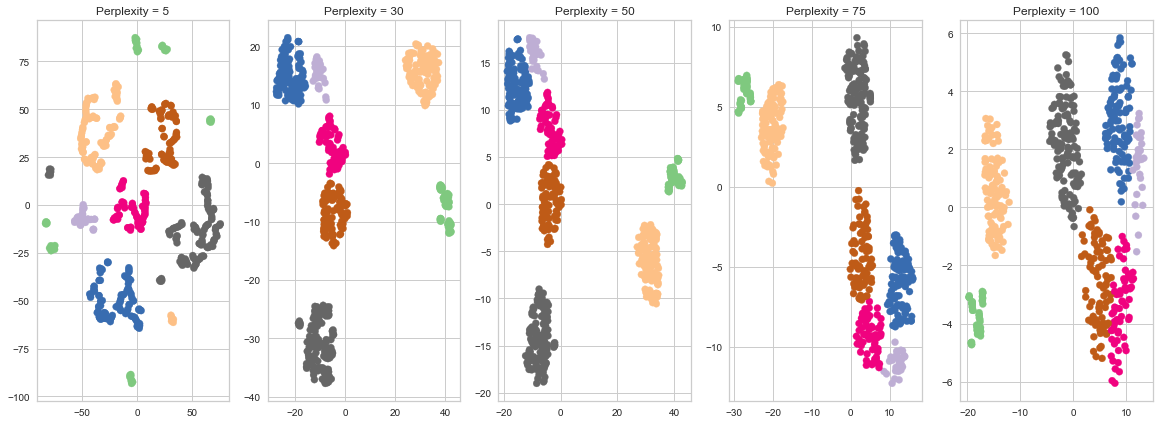

In [158]:
from sklearn.manifold import TSNE


fig, ax = plt.subplots(1, 5, figsize=(20, 7))
for i, perp in enumerate([5, 30, 50, 75, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X['predictions'], cmap='Accent')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()